In [12]:
import pandas as pd
import numpy as np
import random


In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/goura/Favorites/Project_leadership/OROT/netflix_titles.csv")

In [4]:
# Preprocessing: Extract relevant features for the recommendation system
# Let's focus on 'type', 'release_year', 'rating', 'listed_in' (genre)
df = df[['title', 'type', 'release_year', 'rating', 'listed_in']].dropna()

In [5]:
# Sample user preferences (you can modify based on real input)
user_preferences = {
    'type': 'Movie',  # Prefer movies
    'release_year': 2010,  # Prefer content released after 2010
    'rating': 'PG-13',  # Prefer PG-13 rated content
    'listed_in': 'Action'  # Prefer Action genre
}

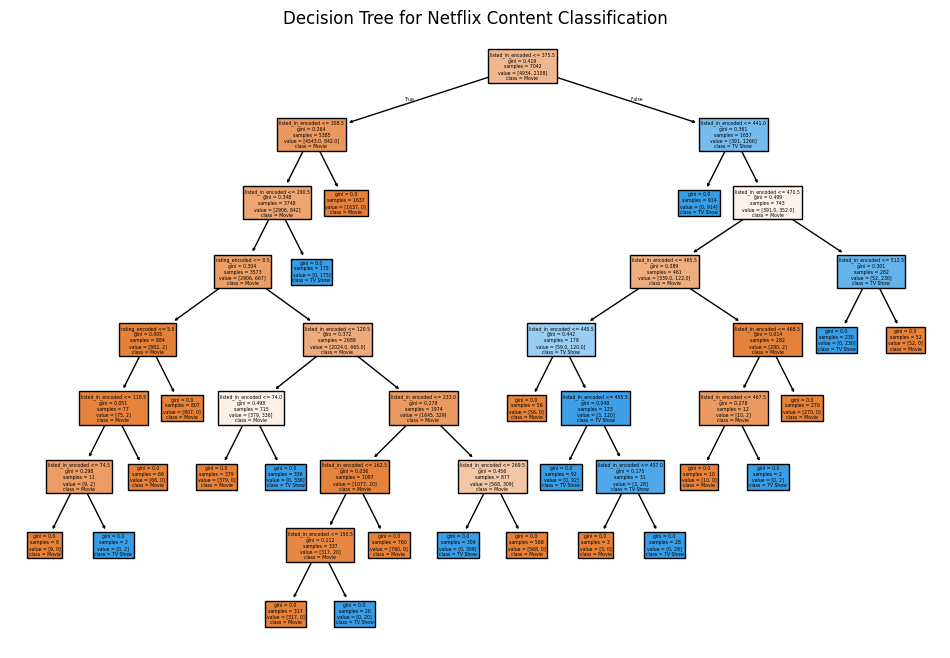

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("C:/Users/goura/Favorites/Project_leadership/OROT/netflix_titles.csv")

# Select relevant features and drop rows with missing values
df = df[['type', 'release_year', 'rating', 'listed_in']].dropna()

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])
df['listed_in_encoded'] = label_encoder.fit_transform(df['listed_in'])

# Prepare the features (X) and target (y)
X = df[['release_year', 'rating_encoded', 'listed_in_encoded']]
y = df['type_encoded']  # Target: Movie (0) or TV Show (1)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['Movie', 'TV Show'], filled=True)
plt.title('Decision Tree for Netflix Content Classification')
plt.show()



In [6]:
# Genetic Algorithm Parameters
population_size = 10
num_generations = 20
mutation_rate = 0.1

In [7]:
# Helper function to compute fitness
def compute_fitness(individual, user_preferences):
    fitness = 0
    for content in individual:
        # Increase fitness based on preference matches
        if content['type'] == user_preferences['type']:
            fitness += 1
        if content['release_year'] >= user_preferences['release_year']:
            fitness += 1
        if content['rating'] == user_preferences['rating']:
            fitness += 1
        if user_preferences['listed_in'] in content['listed_in']:
            fitness += 1
    return fitness

# Generate initial population (random selection of content)
def generate_initial_population(population_size, df):
    population = []
    for _ in range(population_size):
        individual = df.sample(5).to_dict('records')  # Each individual has 5 recommendations
        population.append(individual)
    return population

# Selection: Select individuals based on their fitness (roulette wheel selection)
def selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    selected_idx = np.random.choice(len(population), size=2, p=probabilities)
    return population[selected_idx[0]], population[selected_idx[1]]

# Crossover: Combine two parents to produce offspring
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 2)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Mutation: Randomly mutate an individual by replacing one recommendation
def mutate(individual, df):
    if random.random() < mutation_rate:
        mutation_idx = random.randint(0, len(individual) - 1)
        individual[mutation_idx] = df.sample(1).to_dict('records')[0]
    return individual

# Main Genetic Algorithm
def genetic_algorithm(df, user_preferences, population_size, num_generations):
    # Step 1: Generate initial population
    population = generate_initial_population(population_size, df)
    
    for generation in range(num_generations):
        fitness_scores = [compute_fitness(ind, user_preferences) for ind in population]
        
        # Step 2: Selection, Crossover, and Mutation
        new_population = []
        while len(new_population) < population_size:
            # Select two parents
            parent1, parent2 = selection(population, fitness_scores)
            # Perform crossover
            child1, child2 = crossover(parent1, parent2)
            # Perform mutation
            child1 = mutate(child1, df)
            child2 = mutate(child2, df)
            # Add to new population
            new_population.extend([child1, child2])
        
        # Step 3: Replace old population with new population
        population = new_population[:population_size]
        
        # Print the best fitness score in the current generation
        best_fitness = max(fitness_scores)
        print(f"Generation {generation}: Best Fitness = {best_fitness}")
    
    # Return the best individual from the final population
    final_fitness_scores = [compute_fitness(ind, user_preferences) for ind in population]
    best_individual = population[np.argmax(final_fitness_scores)]
    return best_individual

# Run the genetic algorithm
best_recommendations = genetic_algorithm(df, user_preferences, population_size, num_generations)

# Print the best set of recommendations
print("\nBest Recommendations:")
for recommendation in best_recommendations:
    print(recommendation['title'], "-", recommendation['listed_in'], "-", recommendation['release_year'], "-", recommendation['rating'])

Generation 0: Best Fitness = 13
Generation 1: Best Fitness = 12
Generation 2: Best Fitness = 13
Generation 3: Best Fitness = 12
Generation 4: Best Fitness = 12
Generation 5: Best Fitness = 12
Generation 6: Best Fitness = 13
Generation 7: Best Fitness = 12
Generation 8: Best Fitness = 12
Generation 9: Best Fitness = 12
Generation 10: Best Fitness = 12
Generation 11: Best Fitness = 11
Generation 12: Best Fitness = 11
Generation 13: Best Fitness = 11
Generation 14: Best Fitness = 12
Generation 15: Best Fitness = 11
Generation 16: Best Fitness = 12
Generation 17: Best Fitness = 11
Generation 18: Best Fitness = 11
Generation 19: Best Fitness = 10

Best Recommendations:
Drive - Action & Adventure, International Movies - 2019 - TV-14
The Blue Umbrella - Children & Family Movies, Dramas, Independent Movies - 2005 - TV-PG
The Yin Yang Master - Action & Adventure, International Movies - 2021 - TV-14
You Carry Me - Dramas, International Movies - 2015 - TV-MA
Cop Car - Thrillers - 2015 - R


In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ------- ------------------------------- 30.7/167.0 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 112.6/167.0 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 2.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/7.8 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.2/7.8 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.8 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.8 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.8 MB 2.5 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.8 MB 2.6 MB/s eta 0:00:03


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Distribution of Content Type'}, ylabel='count'>

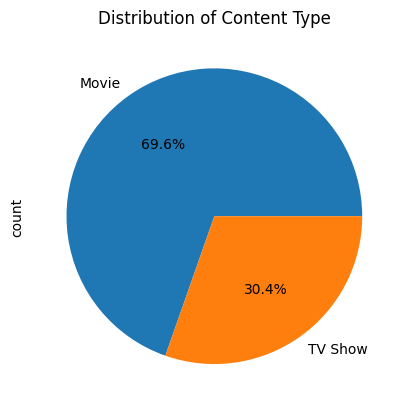

In [17]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Content Type')


<Axes: title={'center': 'Content Released Over the Years'}, xlabel='release_year'>

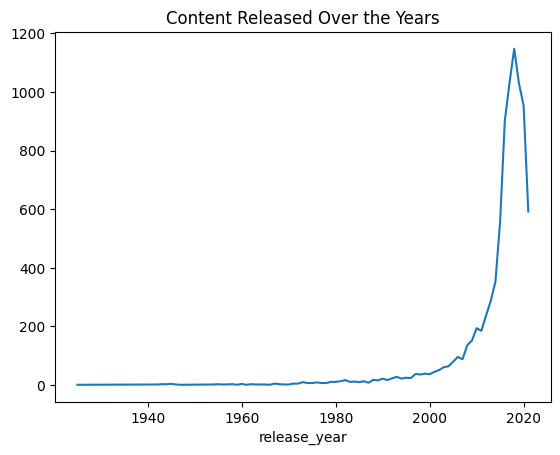

In [18]:
df['release_year'].value_counts().sort_index().plot(kind='line', title='Content Released Over the Years')


<Axes: title={'center': 'Top 10 Content Ratings'}, xlabel='rating'>

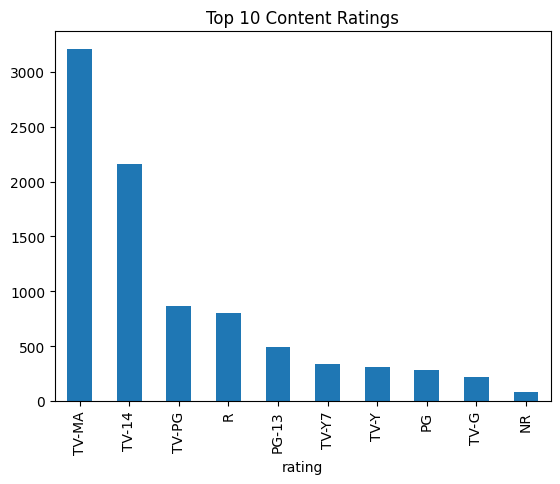

In [19]:
df['rating'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Content Ratings')


<Axes: title={'center': 'Top 10 Genres'}, xlabel='listed_in'>

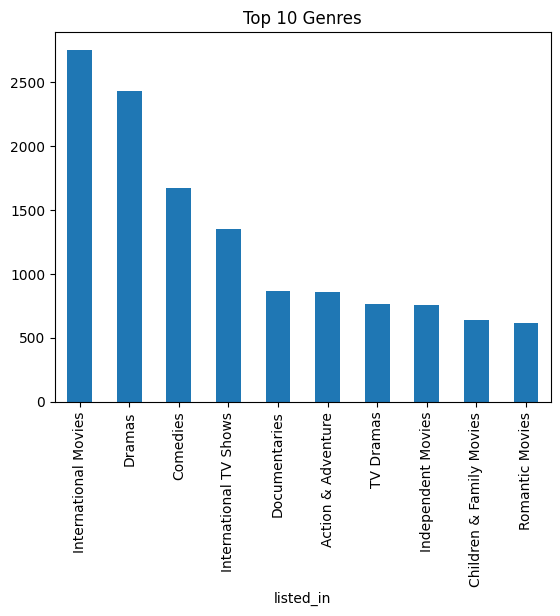

In [20]:
genre_data = df['listed_in'].str.split(',').explode().str.strip().value_counts()
genre_data.nlargest(10).plot(kind='bar', title='Top 10 Genres')


In [21]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/301.4 kB 919.0 kB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


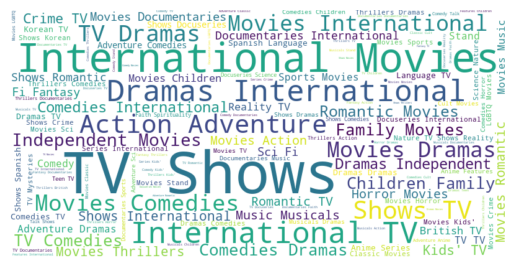

In [22]:
import matplotlib.pyplot as plt  # Add this import
from wordcloud import WordCloud

# Generate the word cloud for genres
genre_text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot


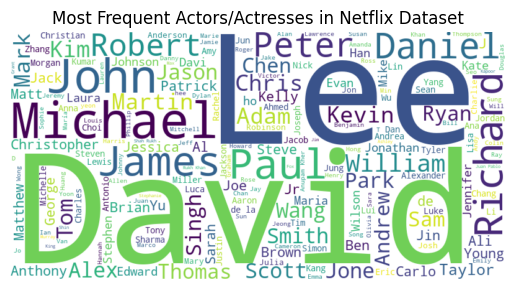

In [26]:
# Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/goura/Favorites/Project_leadership/OROT/netflix_titles.csv')

# Check if the 'cast' column exists
if 'cast' in df.columns:
    # Split the 'cast' column by commas and explode to get individual actors
    cast_series = df['cast'].dropna().str.split(',').explode().str.strip()

    # Join all actor names into a single string for the word cloud
    cast_text = ' '.join(cast_series)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cast_text)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title('Most Frequent Actors/Actresses in Netflix Dataset')
    plt.show()
else:
    print("The 'cast' column is not available in the dataset.")


In [27]:
import matplotlib.pyplot as plt

In [28]:
# To count occurrences of each country and display the top 10 countries producing content
if 'country' in df.columns:
    top_countries = df['country'].dropna().value_counts().head(10)
else:
    top_countries = pd.Series([]) 

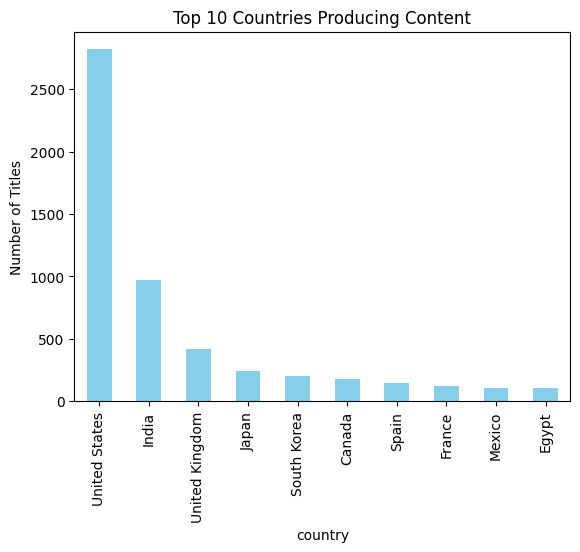

In [29]:
# Plot top 10 countries producing content
if not top_countries.empty:
    top_countries.plot(kind='bar', title='Top 10 Countries Producing Content', color='skyblue')
    plt.ylabel('Number of Titles')
    plt.show()
else:
    print("No valid 'country' data to display.")

In [30]:
# 2. Number of Movies/TV Shows by Rating (handling NaN values)
rating_type_count = df.dropna(subset=['rating', 'type']).groupby(['rating', 'type']).size().unstack(fill_value=0)

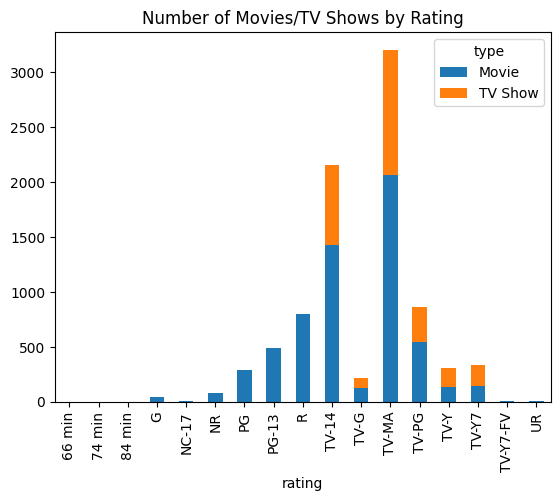

In [31]:
# Plot number of Movies/TV Shows by Rating
rating_type_count.plot(kind='bar', stacked=True, title='Number of Movies/TV Shows by Rating')
plt.show()

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load and prepare the data
file_path = 'C:/Users/goura/Favorites/Project_leadership/OROT/netflix_titles.csv'
data = pd.read_csv(file_path)

# Step 2: Fill missing values in relevant columns (like description and genres)
data['description'] = data['description'].fillna('')
data['listed_in'] = data['listed_in'].fillna('')

# Step 3: Combine relevant text-based columns for content filtering
data['content'] = data['title'] + ' ' + data['listed_in'] + ' ' + data['description']

# Step 4: Create a TF-IDF Vectorizer to convert text into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['content'])

# Step 5: Compute the cosine similarity between all titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 6: Create a function that takes a title and returns recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = data[data['title'].str.contains(title, case=False)].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar titles
    return data['title'].iloc[movie_indices]

# Example usage: Get recommendations for a specific title
recommendations = get_recommendations('Stranger Things')
print(recommendations)


5200         Beyond Stranger Things
3986                         The OA
4733                  Rowdy Rathore
2979                   THE STRANGER
1335                     The Sinner
241                        Manifest
8083                   Star-Crossed
1487                Sakho & Mangane
6167    Anjaan: Special Crimes Unit
887               The Strange House
Name: title, dtype: object


In [4]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 204.8 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 204.8 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 204.8 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 204.8 kB/s eta 0:00:02
   ------------ ------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


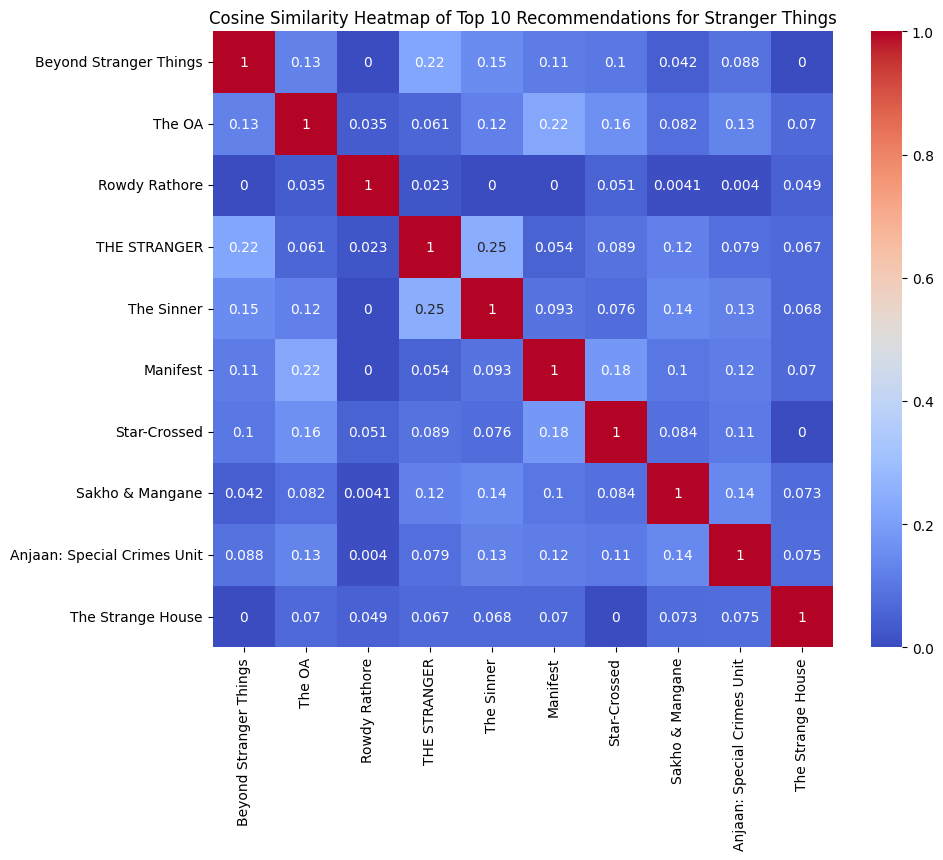

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load and prepare the data
file_path = 'C:/Users/goura/Favorites/Project_leadership/OROT/netflix_titles.csv'
data = pd.read_csv(file_path)

# Step 2: Fill missing values in relevant columns
data['description'] = data['description'].fillna('')
data['listed_in'] = data['listed_in'].fillna('')

# Step 3: Combine relevant text-based columns for content filtering
data['content'] = data['title'] + ' ' + data['listed_in'] + ' ' + data['description']

# Step 4: Create a TF-IDF Vectorizer to convert text into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['content'])

# Step 5: Compute the cosine similarity between all titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 6: Get the recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = data[data['title'].str.contains(title, case=False)].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the top 10 most similar movies
    return data['title'].iloc[movie_indices], movie_indices

# Example: Get recommendations for 'Stranger Things'
recommendations, indices = get_recommendations('Stranger Things')

# Step 7: Graphical Representation

# 1. Heatmap of the cosine similarity scores between the top 10 recommended titles
similarity_scores = cosine_sim[indices][:, indices]  # Similarity scores between top recommendations

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_scores, annot=True, cmap='coolwarm', xticklabels=recommendations, yticklabels=recommendations)
plt.title('Cosine Similarity Heatmap of Top 10 Recommendations for Stranger Things')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


